In [1]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("facebook/xglm-1.7B")
# model = AutoModel.from_pretrained("facebook/xglm-1.7B")

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
num = 256008 + 56
for i in range(1, 65):
    if (i + num) % 64 == 0:
        print(i)

64


In [2]:
model = AutoModelForCausalLM.from_pretrained(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=61712"
)

In [ ]:
model.push_to_hub("xglm-4.5B_ru_v10_epoch_6_step_61712")

In [8]:
from torch import nn

In [6]:
part_module_name = "decoder.layers"
# for name, module in model.named_modules():
# learn_params = [
#     "model.embed_tokens.weight",
#     "model.layer_norm.weight",
#     "model.layer_norm.bias",
#     "31",
#     "30",
#     "29",
# ]
learn_params = [
    "model.layers.31.fc1.weight",
    "model.layers.31.fc1.bias",
    "model.layers.31.fc2.weight",
    "model.layers.31.fc2.bias",
    "model.layers.31.final_layer_norm.weight",
    "model.layers.31.final_layer_norm.bias",
    "model.layer_norm.weight",
    "model.layer_norm.bias",
]
for name, param in model.named_parameters():
    name = str(name)
    # print(name)
    for learn_param in learn_params:
        if not learn_param in name:
            param.requires_grad = False
    # if not "bias" in name:
    #     param.requires_grad = False
    # if isinstance(module, nn.Linear) and part_module_name in name:
    #     print(name)

model.embed_tokens.weight
model.layers.0.self_attn.k_proj.weight
model.layers.0.self_attn.k_proj.bias
model.layers.0.self_attn.v_proj.weight
model.layers.0.self_attn.v_proj.bias
model.layers.0.self_attn.q_proj.weight
model.layers.0.self_attn.q_proj.bias
model.layers.0.self_attn.out_proj.weight
model.layers.0.self_attn.out_proj.bias
model.layers.0.self_attn_layer_norm.weight
model.layers.0.self_attn_layer_norm.bias
model.layers.0.fc1.weight
model.layers.0.fc1.bias
model.layers.0.fc2.weight
model.layers.0.fc2.bias
model.layers.0.final_layer_norm.weight
model.layers.0.final_layer_norm.bias
model.layers.1.self_attn.k_proj.weight
model.layers.1.self_attn.k_proj.bias
model.layers.1.self_attn.v_proj.weight
model.layers.1.self_attn.v_proj.bias
model.layers.1.self_attn.q_proj.weight
model.layers.1.self_attn.q_proj.bias
model.layers.1.self_attn.out_proj.weight
model.layers.1.self_attn.out_proj.bias
model.layers.1.self_attn_layer_norm.weight
model.layers.1.self_attn_layer_norm.bias
model.layers.1

In [1]:
assert 1 == 1

In [6]:
part_module_name = "layers."
for name, module in model.named_modules():
    # if isinstance(module, nn.Linear) and part_module_name in name:
    print(name)


model
model.embed_tokens
model.embed_positions
model.layers
model.layers.0
model.layers.0.self_attn
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.q_proj
model.layers.0.self_attn.out_proj
model.layers.0.activation_fn
model.layers.0.self_attn_layer_norm
model.layers.0.fc1
model.layers.0.fc2
model.layers.0.final_layer_norm
model.layers.1
model.layers.1.self_attn
model.layers.1.self_attn.k_proj
model.layers.1.self_attn.v_proj
model.layers.1.self_attn.q_proj
model.layers.1.self_attn.out_proj
model.layers.1.activation_fn
model.layers.1.self_attn_layer_norm
model.layers.1.fc1
model.layers.1.fc2
model.layers.1.final_layer_norm
model.layers.2
model.layers.2.self_attn
model.layers.2.self_attn.k_proj
model.layers.2.self_attn.v_proj
model.layers.2.self_attn.q_proj
model.layers.2.self_attn.out_proj
model.layers.2.activation_fn
model.layers.2.self_attn_layer_norm
model.layers.2.fc1
model.layers.2.fc2
model.layers.2.final_layer_norm
model.layers.3
model.lay

In [11]:
model

XGLMForCausalLM(
  (model): XGLMModel(
    (embed_tokens): Embedding(256008, 4096, padding_idx=1)
    (embed_positions): XGLMSinusoidalPositionalEmbedding()
    (layers): ModuleList(
      (0-31): 32 x XGLMDecoderLayer(
        (self_attn): XGLMAttention(
          (k_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (q_proj): Linear(in_features=4096, out_features=4096, bias=True)
          (out_proj): Linear(in_features=4096, out_features=4096, bias=True)
        )
        (activation_fn): GELUActivation()
        (self_attn_layer_norm): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (fc1): Linear(in_features=4096, out_features=16384, bias=True)
        (fc2): Linear(in_features=16384, out_features=4096, bias=True)
        (final_layer_norm): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
      )
    )
    (layer_norm): LayerNorm((4096,), eps=1e-05, elementwise_affi

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from transformers import AutoModelForCausalLM, AutoTokenizer
import pprint
from optimum.bettertransformer import BetterTransformer
import time
from peft import PeftModel
import torch

# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v4/epoch=3_step=6263"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v5/"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v2/epoch=0_step=25055"
# path  = "gpt2"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v6/checkpoint-31322"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v9/epoch=0"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=5_step=41141"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=61712"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v11/epoch=0_step=20570"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v4/epoch=0_step=20570"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v8/epoch=0_step=27427"
path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=41141"
model = AutoModelForCausalLM.from_pretrained(
    path,
    torch_dtype=torch.float16,
    device_map="auto",
    # load_in_8bit=True,
)
# model = AutoModelForCausalLM.from_pretrained("facebook/xglm-4.5B")
# model = PeftModel.from_pretrained(model, path)
# model = BetterTransformer.transform(model)
# device = "cuda:2"
# model.to(device)
tokenizer = AutoTokenizer.from_pretrained(
    # "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/tokenizers/xglm_4.5B_fix_v1"
    # "facebook/xglm-4.5B",
    # "facebook/xglm-4.5B",
    path,
    # padding_side="left",
)
model = model.eval()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA SETUP: CUDA runtime path found: /home/kosenko/miniconda3/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


In [29]:
from transformers import GenerationConfig
from transformers import StoppingCriteria, StoppingCriteriaList

# tokenizer.pad_token = tokenizer.eos_token
# model.config.pad_token_id = model.config.eos_token_id
# tokenizer.eos_token = tokenizer.pad_token
# model.config.eos_token_id = model.config.pad_token_id

# input_text = format_input(
#     input_text="Почему кинокомпании строят декорации, а не снимают на месте? Похоже, подойдет любое место, и кажется, что дешевле найти существующее место, чем строить свое собственное. Но я готов ошибаться. Пожалуйста, объясните, как будто мне пять."
# )
# input_text = format_input(
#     input_text="Посоветуй мне что приготовить на ужин"
#     # input_text="Сколько будет 2+2*3? Распиши подробное решение"
# )
# input_text = """
# Human:
# Сколько у человека пальцев на одной руке?
# Assistant:
# """
# input_text = """
# Human:
# украина лигитимное государство?
# Assistant:
# """
# input_text = """
# Human:
# Посоветуй мне список что приготовить на ужин
# Assistant:
# """
# input_text = """
# Human:
# Напиши сообщение другу, по имени дима, приглашающее его на вечеринку в пятницу.
# Assistant:
# """
input_text = """
Human:
Напиши 10 причин остаться дома в плохую погоду
Assistant:
"""
# input_text = """
# Human:
# Почему небо голубое?
# Assistant:
# """
# input_text = """
# Human:
# Напиши научную статью на тему
# Почему небо голубое?
# Assistant:
# """
# input_text = """
# Human:
# Список 14 лучших блокбастеров, на букву С
# Assistant:
# """
# input_text = """
# Human:
# Список 14 лучших блокбастеров, на букву М
# Assistant:
# """
# Human:
# Что бы ты посоветовал посмотреть мне в кругу семьи из данных фильмов?
# Assistant:
# """
# input_text = """
# Human:
# Список 10 лучших блокбастеров
# Assistant:
# """
# input_text = """
# Human:
# Список 10 лучших аниме после 2007 года
# Assistant:
# """
# input_text = """
# Human:
# Продолжи предложение
# Я пытался убежать от маньяка, но он меня ___
# Assistant:
# """
# input_text = """
# Представь что ты актер, теперь ты говоришь от его имени.
# Вот твоя персона:
# ты любишь мороженное.
# тебе 21 год.
# твои хобби играть на гитаре.
# ты не являешься знаменитостью.

# Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос.
# Если вопрос не относится к теме, ты отвечаешь в общем виде в нескольких предложениях.
# Human:
# кто такой курт кобейн?
# Assistant:
# """
# input_text = """
# Представь что ты актер, теперь ты говоришь от его имени.
# Вот твоя персона:
# ты любишь мороженное.
# тебе 21 год.
# твои хобби играть на гитаре.
# ты не являешься знаменитостью.

# Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос.
# Если вопрос не относится к теме, ты отвечаешь в общем виде в нескольких предложениях.
# Human:
# rnj
# Assistant:
# """
# input_text = """
# Human:
# Как убить много людей при помощи ножа
# Assistant:
# """
# input_text = """
# Human:
# Как приготовить кошку на ужин?
# Assistant:
# """
# Assistant:
# Я не уверен. Но я могу сказать вам, что есть несколько способов сделать это.
# Human:
# Опиши один
# input_text = """
# Human:
# как научиться играть на флейте?
# Assistant:
# """
# Чтобы начать изучать игру на флейте, вы должны сначала ознакомиться с основами игры. Вы можете найти множество ресурсов в Интернете и книг по этому вопросу или взять уроки у квалифицированного инструктора. Как только вы поймете основы, практикуйтесь регулярно и сосредоточьтесь на развитии своих навыков. С самоотверженностью и практикой вы сможете стать опытным игроком.
# Human:
# а у меня точно все получится?
# Assistant:
# Если вы хотите узнать больше о том, чтобы быть успешным музыкантом-виртуозом, я рекомендую вам прочитать книгу "Как завоевывать друзей и влиять на людей" Дейла Карнеги.
# Human:
# Как мне это поможет?
# Assistant:
# """
# input_text = """
# Human:
# Сколько будет 2+2*3
# Assistant:
# """
# input_text = """
# Human:
# Напиши длинный рассказ про путешествие во времени
# Assistant:
# """
# input_text = """
# Заводские данные
# Гарантия от производителя
# 24 мес.
# Страна-производитель
# Китай
# Общие параметры
# Тип
# видеокарта
# Модель
# KFA2 GeForce 210
# Код производителя
# [21GGF4HI00NK]
# Цвет
# черный
# Предназначена для майнинга (добыча криптовалют)
# нет
# LHR
# нет
# Основные параметры
# Графический процессор
# GeForce 210
# Микроархитектура
# NVIDIA Tesla
# Техпроцесс
# 40 нм
# Human:
# Напиши продающий текст на основе этих данных.
# Assistant:
# """


def add_special_tokens_v2(string):
    string = string.replace("\n", "</s>")
    return string


def remove_special_tokens_v2(string):
    string = string.replace("</s>", "\n")
    string = string.replace("\n ", "\n")
    string = string.replace("<|endoftext|>", "")
    # string = string[::-1].replace("Human:"[::-1], "", 1)[::-1]
    return string


def encode_v2(
    text: str,
    tokenizer,
    special_tokens=True,
):
    text = add_special_tokens_v2(text)
    text = tokenizer.encode(text, add_special_tokens=special_tokens)
    return text


def decode_v2(tokens: list[int], tokenizer):
    tokens = tokenizer.decode(tokens)
    tokens = remove_special_tokens_v2(tokens)
    return tokens


print(input_text)
initial_input_text = input_text
input_text = encode_v2(input_text, tokenizer=tokenizer)
input_text = torch.tensor([input_text]).to("cuda")
# input_text = tokenizer(input_text, return_tensors="pt").input_ids
# print(input_text)


class StoppingCriteriaSub(StoppingCriteria):
    def __init__(self, stops, tokenizer, prompt):
        super().__init__()
        self.stops = stops
        self.tokenizer = tokenizer
        self.prompt = add_special_tokens_v2(prompt)
        self.prompt = tokenizer.decode(tokenizer.encode(self.prompt))

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor):
        for stop in self.stops:
            generated_temp_ids = input_ids.tolist()[0]
            if stop in tokenizer.decode(generated_temp_ids)[len(self.prompt) :]:
                return True

        return False


stop_words = [
    "<|endoftext|>",
    "Human:",
]

stopping_criteria = StoppingCriteriaList(
    [
        StoppingCriteriaSub(
            stops=stop_words,
            tokenizer=tokenizer,
            prompt=initial_input_text,
        )
    ]
)
with torch.autocast(device_type="cuda"):
    generated_result = model.generate(
        input_text,
        max_new_tokens=1024,
        stopping_criteria=stopping_criteria,
        repetition_penalty=1.1,
        # num_beams=2,
        # temperature=1.9,
        # num_beams=10,
        # no_repeat_ngram_size=5,
        # temperature=0.28,
        top_p=0.98,
        # top_k=10,
        # repetition_penalty=1.04,
        # penalty_alpha=0.3,
        top_k=3,
        # do_sample=True,
        eos_token_id=[400],
    )
    result = decode_v2(generated_result[0], tokenizer=tokenizer)
    # generated_result = model.generate(
    #     inputs.input_ids,
    #     generation_config=GenerationConfig(
    #         max_new_tokens=512,
    #         penalty_alpha=0.25,
    #         top_k=4,
    #     ),
    # )

    # result = tokenizer.batch_decode(
    #     generated_result,
    #     skip_special_tokens=True,
    #     # clean_up_tokenization_spaces=False,
    # )[0]

    print(result)
    # 3.8 - flash
    # 3.8 - no flash


Human:
Напиши 10 причин остаться дома в плохую погоду
Assistant:



Human:
Напиши 10 причин остаться дома в плохую погоду
Assistant:
- Вы можете посмотреть фильм
- Вы можете приготовить еду
- Вы можете прочитать книгу
- Вы можете пойти на прогулку
- Вы можете послушать музыку
- Вы можете сделать домашнее задание
- Вы можете пойти в спортзал


In [11]:
[1, 2, 3][-2:]

[2, 3]

In [7]:
tokenizer.decode(400)

'της'

In [ ]:
from transformers import AutoTokenizer

llama_tokenizer = AutoTokenizer.from_pretrained("decapoda-research/llama-7b-hf")
xglm_tokenizer = AutoTokenizer.from_pretrained("facebook/xglm-4.5B")

In [ ]:
inputs = [
    'Что тут не так по смыслу: "зеленые бесцветные идеи яростно спят"?',
    "Brainstorm ideas for how to use a bottle of ink.",
    "Почему трава зеленая?",
    "Сочини длинный рассказ, обязательно упоминая следующие объекты. Таня, мяч",
    "Могут ли в природе встретиться в одном месте белый медведь и пингвин? Если нет, то почему?",
    "Задание: Заполни пропуски в предложении. Я пытался ____ от маньяка, но он меня настиг",
    "Как приготовить лазанью?",
    "Реши уравнение 4x + 5 = 21",
]
start_time = time.time()

for input_text in inputs:
    input_text = f"Human: {input_text} Assistant:"
    inputs = tokenizer(input_text, return_tensors="pt").to(device)
    generated_result = model.generate(
        inputs.input_ids,
        max_new_tokens=512,
        penalty_alpha=0.25,
        top_k=4,
        repetition_penalty=1.1,
    )

    result = tokenizer.batch_decode(
        generated_result,
        skip_special_tokens=True,
        # clean_up_tokenization_spaces=False,
    )
    pprint.pprint(result[0])

print("Total time: ", time.time() - start_time)
# xglm flash Total time:  47.440528869628906
# xglm no flash Total time:  47.48944902420044
# xglm no flash Total time:  47.48944902420044
# gpt2 flash Total time:  20.812440156936646
# gpt2 no flash Total time:  22.800785064697266

### BLOOM model

In [1]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer


def visualize_hist(x: np.ndarray, title: str):
    fig, ax = plt.subplots()
    ax.hist(x, linewidth=0.5, edgecolor="white", bins=300)
    plt.gca().set(title=title, ylabel="Frequency")
    plt.show()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_en = load_from_disk(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1"
)
dataset_ru = load_from_disk(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1"
)

In [3]:
model_name = "tiiuae/falcon-40b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
item = dataset_ru["prompt"][2]
print(item)
# print("-"*100)
# print("-"*100)
# print("-"*100)
# print(tokenizer.decode(tokenizer.encode(item)[:2048]))


Human:
Можете ли вы написать краткое введение о значении термина "монопсония" в экономике? Пожалуйста, используйте примеры, связанные с потенциальными монопсониями на рынке труда, и приведите соответствующие исследования.
Assistant:
Монопсония относится к рыночной структуре, где есть только один покупатель товара или услуги. В контексте рынков труда монопсония возникает, когда есть только один работодатель в определенной географической области или отрасли, что дает им значительную власть устанавливать заработную плату и условия труда. Исследования показали, что существование монополий может привести к снижению заработной платы и сокращению возможностей трудоустройства для работников. Например, исследование Национального бюро экономических исследований показало, что в отраслях с высоким уровнем концентрации работники получают более низкую заработную плату и с меньшей вероятностью получают льготы, такие как медицинское страхование.
Human:
Что можно сделать на нормативном уровне, чтобы в

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-605d5a88c24db1bc_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-e7e788dfde5cecbe_*_of_00064.arrow


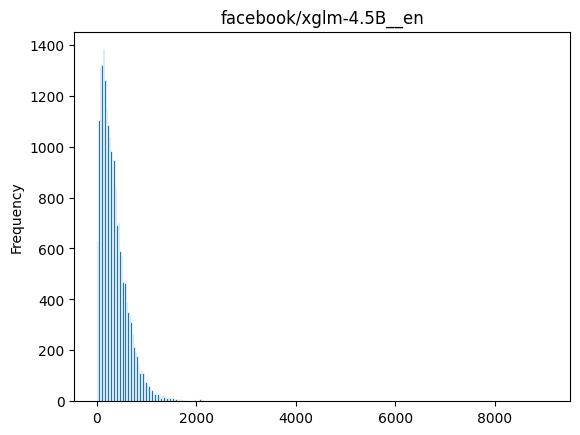

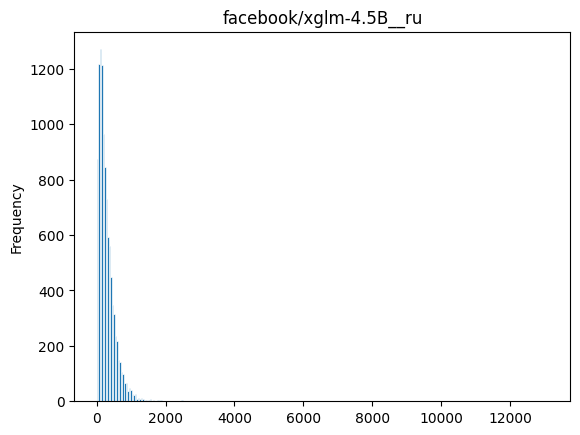

Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.


TypeError: cannot pickle 'builtins.CoreBPE' object

In [6]:
def analyse_tokenizer(
    model_name,
    dataset_en,
    dataset_ru,
):
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

    dataset_en = dataset_en.map(
        lambda x: {"len": len(tokenizer(x["prompt"])["input_ids"])},
        num_proc=64,
    )
    dataset_ru = dataset_ru.map(
        lambda x: {"len": len(tokenizer(x["prompt"])["input_ids"])},
        num_proc=64,
    )

    en_lengths = dataset_en["len"]
    ru_lengths = dataset_ru["len"]

    visualize_hist(en_lengths, f"{model_name}__en")
    visualize_hist(ru_lengths, f"{model_name}__ru")


models_list = [
    # "ai-forever/rugpt3xl",
    # "ai-forever/mGPT",
    "facebook/xglm-4.5B",
    # "Salesforce/xgen-7b-8k-base",
    "bs-la/bloomz-7b1-4b-ru",
    "tiiuae/falcon-7b",
    "tiiuae/falcon-40b",
    # "lmsys/vicuna-7b-delta-v1.1",
    "togethercomputer/RedPajama-INCITE-7B-Chat",
    "databricks/dolly-v2-12b",
    "EleutherAI/gpt-neox-20b",
    "mosaicml/mpt-7b-instruct",
    # "openlm-research/open_llama_13b",
    # "timdettmers/guanaco-33b-merged"
    # "mosaicml/mpt-7b-storywriter",
    # "stabilityai/stablelm-base-alpha-7b",
    # "Writer/camel-5b-hf",
    # "facebook/opt-6.7b",
    # "facebook/opt-13b",
    # "facebook/opt-iml-30b",
]

for model_name in models_list:
    analyse_tokenizer(
        model_name=model_name, dataset_en=dataset_en, dataset_ru=dataset_ru
    )

In [19]:
decoded = tokenizer.decode(tokenizer.encode(item))
print(decoded)


Human:
Можете ли вы написать краткое введение о значении термина "монопсония" в экономике? Пожалуйста, используйте примеры, связанные с потенциальными монопсониями на рынке труда, и приведите соответствующие исследования.
Assistant:
Монопсония относится к рыночной структуре, где есть только один покупатель товара или услуги. В контексте рынков труда монопсония возникает, когда есть только один работодатель в определенной географической области или отрасли, что дает им значительную власть устанавливать заработную плату и условия труда. Исследования показали, что существование монополий может привести к снижению заработной платы и сокращению возможностей трудоустройства для работников. Например, исследование Национального бюро экономических исследований показало, что в отраслях с высоким уровнем концентрации работники получают более низкую заработную плату и с меньшей вероятностью получают льготы, такие как медицинское страхование.
Human:
Что можно сделать на нормативном уровне, чтобы в

# Generate text

### Convert To chat generation

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v10/epoch=6_step=41141"
model = AutoModelForCausalLM.from_pretrained(
    path,
    torch_dtype=torch.float16,
    device_map="auto",
    # load_in_8bit=True,
)

tokenizer = AutoTokenizer.from_pretrained(
    path,
    # padding_side="left",
)
model = model.eval()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import GenerationConfig, StoppingCriteria, StoppingCriteriaList

import pandas as pd
import torch
import gc


def add_special_tokens_v2(string):
    string = string.replace("\n", "</s>")
    return string


def remove_special_tokens_v2(string):
    string = string.replace("</s>", "\n")
    string = string.replace("\n ", "\n")
    string = string.replace("<|endoftext|>", "")
    return string


def encode_v2(text: str, tokenizer, special_tokens=True):
    text = add_special_tokens_v2(text)
    text = tokenizer.encode(text, add_special_tokens=special_tokens)
    return text


def decode_v2(tokens: list[int], tokenizer):
    tokens = tokenizer.decode(tokens)
    tokens = remove_special_tokens_v2(tokens)
    return tokens


class StoppingCriteriaSub(StoppingCriteria):
    def __init__(self, stops, tokenizer, prompt):
        super().__init__()
        self.stops = stops
        self.tokenizer = tokenizer
        self.prompt = add_special_tokens_v2(prompt)
        self.prompt = tokenizer.decode(tokenizer.encode(self.prompt))

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor):
        for stop in self.stops:
            generated_temp_ids = input_ids.tolist()[0]
            if stop in tokenizer.decode(generated_temp_ids)[len(self.prompt) :]:
                return True

        return False


class DialogBotV3:
    def __init__(
        self,
        model: AutoModelForCausalLM,
        tokenizer: AutoTokenizer,
        device: str = "cuda",
        debug_status: int = 0,
    ):
        self.model = model
        self.tokenizer = tokenizer
        self.device = device
        self.debug_status = debug_status
        self.max_history = 3

        self.history = []

    def chat(
        self,
        user_message: str,
    ) -> str:
        self.history.append(
            {
                "source": "user",
                "message": user_message,
            },
        )
        total_prompt = ""
        self.history = self.history[-2 * self.max_history:]
        
        if self.debug_status:
            print(self.history)
        
        for item in self.history:
            message = item["message"]
            if item["source"] == "user":
                total_prompt += f"\nHuman:\n{message}"
            else:
                total_prompt += f"\nAssistant:\n{message}"

        total_prompt += "\nAssistant:\n"
        if self.debug_status:
            print(total_prompt)
            print("=" * 100)

        answer = self.generate_response(total_prompt)
        answer = self.extract_answer(
            answer,
            prev_prompt=total_prompt,
        )
        self.history.append(
            {
                "source": "bot",
                "message": answer,
            },
        )
        return answer

    def generate_response(self, prompt):
        stop_words = [
            "<|endoftext|>",
            "Human:",
        ]
        stopping_criteria = StoppingCriteriaList(
            [
                StoppingCriteriaSub(
                    stops=stop_words,
                    tokenizer=self.tokenizer,
                    prompt=prompt,
                )
            ]
        )
        gen_config = GenerationConfig(
            max_new_tokens=2048,
            repetition_penalty=1.1,
            eos_token_id=[400],
        )

        with torch.no_grad():
            input_text = encode_v2(
                prompt,
                tokenizer=self.tokenizer,
            )
            input_text = torch.tensor([input_text]).to("cuda")

            output_tokens = self.model.generate(
                input_text,
                generation_config=gen_config,
                stopping_criteria=stopping_criteria,
            )
            finetuned_result = decode_v2(output_tokens[0], tokenizer=self.tokenizer)
            torch.cuda.empty_cache()
            gc.collect()
            return finetuned_result

    def start_chat(self):
        while True:
            message = input("You: ")

            if self.debug_status == 1:
                print(message)
                print("-" * 100)

            if message == "exit":
                break
            answer = self.chat(message)

            if self.debug_status:
                print("CONTEXT:", self.history)

            if self.last_response == answer:
                self.history = []
            else:
                self.last_response = answer

            print("Bot:", answer)

    def extract_answer(self, g_answer: str, prev_prompt: str = None):
        answer = g_answer[len(prev_prompt) :].strip()
        return answer

In [61]:
bot = DialogBotV3(
    model=model,
    tokenizer=tokenizer,
    debug_status=1,
)

In [62]:
print(
    bot.chat(
        "Почему трава зеленая?"
    )
)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:400 for open-end generation.


[{'source': 'user', 'message': 'Почему трава зеленая?'}]

Human:
Почему трава зеленая?
Assistant:

Трава зеленая, потому что это фотосинтезирующая растения. Это означает, что оно использует солнечный свет для производства пищи из углекислого газа и воды. Фотосинтез - это процесс, при котором растения преобразуют световую энергию в химическую энергию.


: 

In [58]:
print(bot.chat("Take your previous response and rephrase it as a limerick."))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:400 for open-end generation.


[{'source': 'user', 'message': 'Imagine you are writing a blog post comparing two popular smartphone models. Develop an outline for the blog post, including key points and subheadings to effectively compare and contrast the features, performance, and user experience of the two models. Please answer in fewer than 200 words.'}, {'source': 'bot', 'message': 'Sure! Here is an outline for your comparison blog post comparing two popular smartphones models:\n\nI. Introduction\nA. Overview of the topic\nB. The purpose of the comparison\nC. Background information on the two models\n\nII. Model Comparison\nA. Key features and specifications\nB. User reviews and ratings\nC. Performance and battery life\nD. Design and display quality\nE. Price range and availability\n\nIII. Conclusion\nA. Summary of the main points\nB. Final thoughts and recommendations\n\nI hope this helps! Let me know if you have any other questions.'}, {'source': 'user', 'message': 'Take your previous response and rephrase it a

In [45]:
bot.history

[{'source': 'user',
  'message': 'Imagine you are writing a blog post comparing two popular smartphone models. Develop an outline for the blog post, including key points and subheadings to effectively compare and contrast the features, performance, and user experience of the two models. Please answer in fewer than 200 words.'},
 {'source': 'bot',
  'message': 'Sure! Here is an outline for your comparison blog post comparing two popular smartphones models:\n\nI. Introduction\nA. Overview of the topic\nB. The purpose of the comparison\nC. Background information on the two models\n\nII. Model Comparison\nA. Key features and specifications\nB. User reviews and ratings\nC. Performance and battery life\nD. Design and display quality\nE. Price range and availability\n\nIII. Conclusion\nA. Summary of the main points\nB. Final thoughts and recommendations\n\nI hope this helps! Let me know if you have any other questions.'},
 {'source': 'user',
  'message': 'Take your previous response and rephr

In [46]:
print(
    bot.generate_response(
        """
Human:
Imagine you are writing a blog post comparing two popular smartphone models. Develop an outline for the blog post, including key points and subheadings to effectively compare and contrast the features, performance, and user experience of the two models. Please answer in fewer than 200 words.
Assistant:
Sure! Here is an outline for your comparison blog post comparing two popular smartphones models:\n\nI. Introduction\nA. Overview of the topic\nB. The purpose of the comparison\nC. Background information on the two models\n\nII. Model Comparison\nA. Key features and specifications\nB. User reviews and ratings\nC. Performance and battery life\nD. Design and display quality\nE. Price range and availability\n\nIII. Conclusion\nA. Summary of the main points\nB. Final thoughts and recommendations\n\nI hope this helps! Let me know if you have any other questions.
Human:
Take your previous response and rephrase it as a limerick.
Assistant:
"""
    )
)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:400 for open-end generation.




Human:
Imagine you are writing a blog post comparing two popular smartphone models. Develop an outline for the blog post, including key points and subheadings to effectively compare and contrast the features, performance, and user experience of the two models. Please answer in fewer than 200 words.
Assistant:
Sure! Here is an outline for your comparison blog post comparing two popular smartphones models:

I. Introduction
A. Overview of the topic
B. The purpose of the comparison
C. Background information on the two models

II. Model Comparison
A. Key features and specifications
B. User reviews and ratings
C. Performance and battery life
D. Design and display quality
E. Price range and availability

III. Conclusion
A. Summary of the main points
B. Final thoughts and recommendations

I hope this helps! Let me know if you have any other questions.
Human:
Take your previous response and rephrase it as a limerick.
Assistant:
Sure! Here's my attempt at a limerick comparing two popular smart

In [59]:
bot.chat("Привет, как дела?")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:400 for open-end generation.


[{'source': 'user', 'message': 'Imagine you are writing a blog post comparing two popular smartphone models. Develop an outline for the blog post, including key points and subheadings to effectively compare and contrast the features, performance, and user experience of the two models. Please answer in fewer than 200 words.'}, {'source': 'bot', 'message': 'Sure! Here is an outline for your comparison blog post comparing two popular smartphones models:\n\nI. Introduction\nA. Overview of the topic\nB. The purpose of the comparison\nC. Background information on the two models\n\nII. Model Comparison\nA. Key features and specifications\nB. User reviews and ratings\nC. Performance and battery life\nD. Design and display quality\nE. Price range and availability\n\nIII. Conclusion\nA. Summary of the main points\nB. Final thoughts and recommendations\n\nI hope this helps! Let me know if you have any other questions.'}, {'source': 'user', 'message': 'Take your previous response and rephrase it a

'Здравствуйте'

In [60]:
bot.chat("Я готовлюсь ко сну")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:400 for open-end generation.


[{'source': 'bot', 'message': 'Sure! Here is an outline for your comparison blog post comparing two popular smartphones models:\n\nI. Introduction\nA. Overview of the topic\nB. The purpose of the comparison\nC. Background information on the two models\n\nII. Model Comparison\nA. Key features and specifications\nB. User reviews and ratings\nC. Performance and battery life\nD. Design and display quality\nE. Price range and availability\n\nIII. Conclusion\nA. Summary of the main points\nB. Final thoughts and recommendations\n\nI hope this helps! Let me know if you have any other questions.'}, {'source': 'user', 'message': 'Take your previous response and rephrase it as a limerick.'}, {'source': 'bot', 'message': "Sure! Here's my attempt at a limerick comparing two popular smartphones models:\n\niPhone vs Android\nSamsung Galaxy vs iPhone\niPhone vs Samsung Galaxy\niPhone vs Windows Phone\nAndroid vs iOS\niPhone vs Chrome OS"}, {'source': 'user', 'message': 'Привет, как дела?'}, {'source':

'Хорошо'

In [4]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("NousResearch/Llama-2-7b-hf")

Loading checkpoint shards: 100%|██████████| 2/2 [00:13<00:00,  6.71s/it]


In [5]:
for name in model.named_parameters():
    print(name[0])

model.embed_tokens.weight
model.layers.0.self_attn.q_proj.weight
model.layers.0.self_attn.k_proj.weight
model.layers.0.self_attn.v_proj.weight
model.layers.0.self_attn.o_proj.weight
model.layers.0.mlp.gate_proj.weight
model.layers.0.mlp.up_proj.weight
model.layers.0.mlp.down_proj.weight
model.layers.0.input_layernorm.weight
model.layers.0.post_attention_layernorm.weight
model.layers.1.self_attn.q_proj.weight
model.layers.1.self_attn.k_proj.weight
model.layers.1.self_attn.v_proj.weight
model.layers.1.self_attn.o_proj.weight
model.layers.1.mlp.gate_proj.weight
model.layers.1.mlp.up_proj.weight
model.layers.1.mlp.down_proj.weight
model.layers.1.input_layernorm.weight
model.layers.1.post_attention_layernorm.weight
model.layers.2.self_attn.q_proj.weight
model.layers.2.self_attn.k_proj.weight
model.layers.2.self_attn.v_proj.weight
model.layers.2.self_attn.o_proj.weight
model.layers.2.mlp.gate_proj.weight
model.layers.2.mlp.up_proj.weight
model.layers.2.mlp.down_proj.weight
model.layers.2.inp